In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [3]:
df=pd.read_csv("../Res/Star39552_balanced.csv")


In [4]:
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
...,...,...,...,...,...,...,...
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [6]:
df.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

In [7]:
df.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [8]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [9]:
df = df.drop(columns=['SpType'])

/var/folders/x0/0t1sxw7s6lj26c202j_swc540000gn/T/ipykernel_6624/4139034290.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TargetClass', data=df, palette='muted')


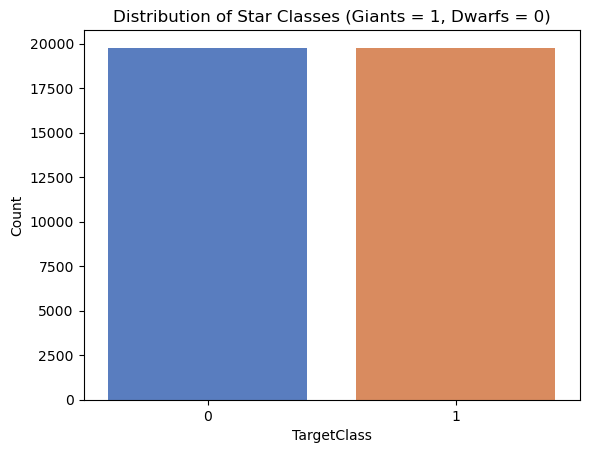

In [10]:
sns.countplot(x='TargetClass', data=df, palette='muted')
plt.title('Distribution of Star Classes (Giants = 1, Dwarfs = 0)')
plt.xlabel('TargetClass')
plt.ylabel('Count')
plt.show()

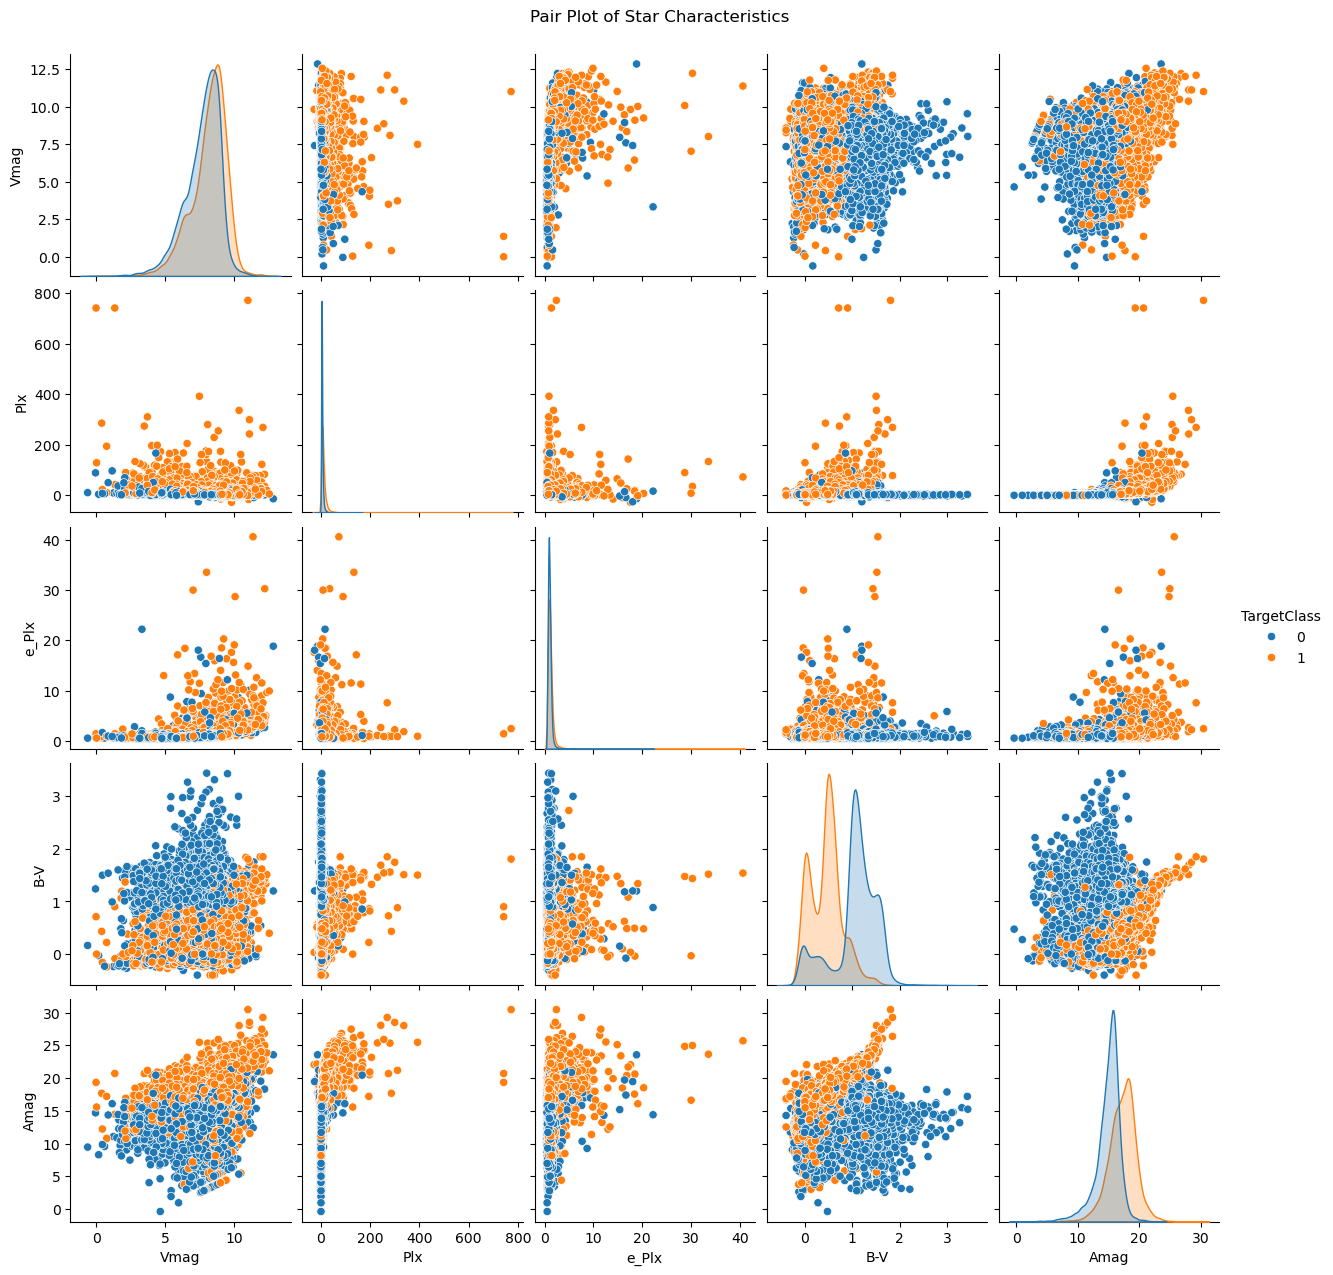

In [11]:
columns_to_plot = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag', 'TargetClass']

sns.pairplot(df[columns_to_plot], hue='TargetClass')
plt.suptitle('Pair Plot of Star Characteristics', y=1.02)
plt.show()

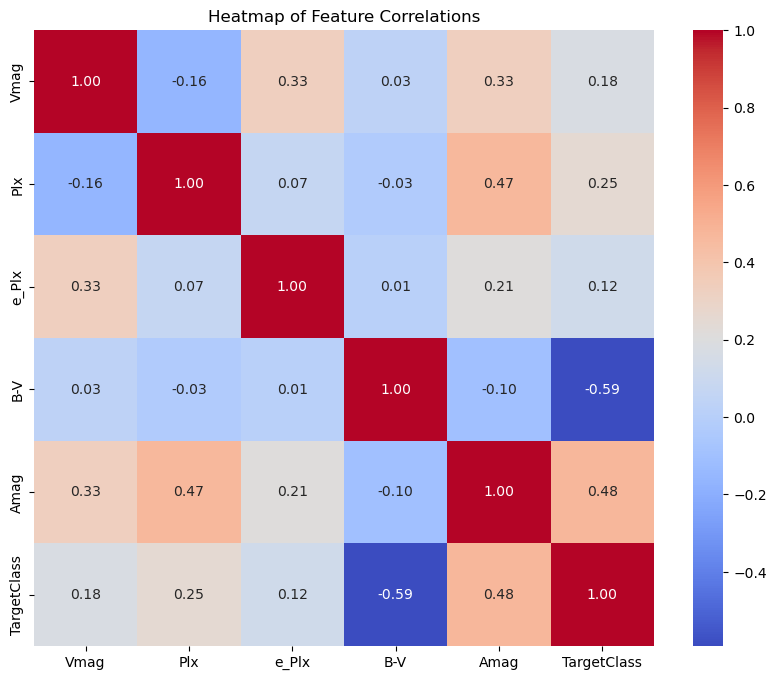

In [42]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [12]:
X = df.drop(columns=['TargetClass'])
y = df['TargetClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
svc_model = SVC()

svc_model.fit(X_train, y_train)

# predictions
y_pred_svc = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svc)
classification_rep = classification_report(y_test, y_pred_svc)

print("SVC Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

SVC Accuracy: 0.8790291998483125
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      3871
           1       0.86      0.91      0.89      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [14]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8781443559600556
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3871
           1       0.87      0.90      0.88      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911



In [15]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8816837315130831
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3871
           1       0.88      0.90      0.89      4040

    accuracy                           0.88      7911
   macro avg       0.88      0.88      0.88      7911
weighted avg       0.88      0.88      0.88      7911

